# Log-Rank test

Supongamos que se requiere realizar una prueba sobre un medicamento. Existen dos grupos y lo que se compara es su función de supervivencia:
- Grupo control
- Grupo de tratamiento 

Se comparan las curvas asociadas a cada grupo y tratamos de contestar si las curvas:
- son iguales, underfit o un overfit.

In [1]:
import pandas as pd

veteran = pd.read_csv("veteran.csv")

In [2]:
veteran.head() 

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
0,1,1,squamous,72,1,60,7,69,0
1,2,1,squamous,411,1,70,5,64,10
2,3,1,squamous,228,1,60,3,38,0
3,4,1,squamous,126,1,60,9,63,10
4,5,1,squamous,118,1,70,11,65,10


In [3]:
veteran.tail() 

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
132,133,2,large,133,1,75,1,65,0
133,134,2,large,111,1,60,5,64,0
134,135,2,large,231,1,70,18,67,10
135,136,2,large,378,1,80,4,65,0
136,137,2,large,49,1,30,3,37,0


In [3]:
veteran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  137 non-null    int64 
 1   trt         137 non-null    int64 
 2   celltype    137 non-null    object
 3   time        137 non-null    int64 
 4   status      137 non-null    int64 
 5   karno       137 non-null    int64 
 6   diagtime    137 non-null    int64 
 7   age         137 non-null    int64 
 8   prior       137 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 9.8+ KB


In [4]:
veteran.describe()

,Unnamed: 0,trt,time,status,karno,diagtime,age,prior
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,1.496350,121.627737,0.934307,58.569343,8.773723,58.306569,2.919708
std,39.692569,0.501821,157.816722,0.248655,20.039592,10.612141,10.541628,4.563375
min,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,34.000000,0.000000
25%,35.000000,1.000000,25.000000,1.000000,40.000000,3.000000,51.000000,0.000000
50%,69.000000,1.000000,80.000000,1.000000,60.000000,5.000000,62.000000,0.000000
75%,103.000000,2.000000,144.000000,1.000000,75.000000,11.000000,66.000000,10.000000
max,137.000000,2.000000,999.000000,1.000000,99.000000,87.000000,81.000000,10.000000


Observaciones sobre la tabla:
- status son los datos de censura.
- Vamos a estar interesados en ambos grupos: trt$=1$ y trt$=2$.

In [14]:
veteran.shape

(137, 9)

In [5]:
veteran[veteran.trt == 1]

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
0,1,1,squamous,72,1,60,7,69,0
1,2,1,squamous,411,1,70,5,64,10
2,3,1,squamous,228,1,60,3,38,0
3,4,1,squamous,126,1,60,9,63,10
4,5,1,squamous,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...,...
64,65,1,large,143,1,90,8,60,0
65,66,1,large,105,1,80,11,66,0
66,67,1,large,103,1,80,5,38,0
67,68,1,large,250,1,70,8,53,10


In [6]:
veteran1=veteran[veteran.trt==1].drop(["trt", "Unnamed: 0"],axis=1)
veteran1.head()

,celltype,time,status,karno,diagtime,age,prior
0,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
2,squamous,228,1,60,3,38,0
3,squamous,126,1,60,9,63,10
4,squamous,118,1,70,11,65,10


In [8]:
veteran1.iloc[0:3]

,celltype,time,status,karno,diagtime,age,prior
0,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
2,squamous,228,1,60,3,38,0


In [9]:
veteran2=veteran[veteran.trt==2].drop(["trt", "Unnamed: 0"],axis=1)
veteran2.head() 

,celltype,time,status,karno,diagtime,age,prior
69,squamous,999,1,90,12,54,10
70,squamous,112,1,80,6,60,0
71,squamous,87,0,80,3,48,0
72,squamous,231,0,50,8,52,10
73,squamous,242,1,50,1,70,0


In [10]:
from lifelines import ExponentialFitter

In [11]:
expf = ExponentialFitter().fit(veteran1["time"], veteran1["status"])

In [12]:
expf

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 69 total observations, 5 right-censored observations>

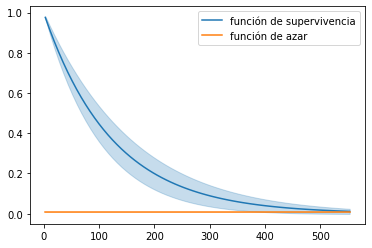

In [13]:
import matplotlib.pyplot as plt

expf.plot_survival_function(label="función de supervivencia").legend()
expf.plot_hazard(label="función de azar").legend()

## Predecir usando machine learning

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(veteran1)

In [16]:
train.head(3)

,celltype,time,status,karno,diagtime,age,prior
61,large,200,1,80,12,41,10
34,smallcell,52,1,70,2,55,0
48,adeno,117,1,80,2,38,0


In [17]:
train.shape

(51, 7)

In [18]:
test.head(3)

,celltype,time,status,karno,diagtime,age,prior
9,squamous,100,0,70,6,70,0
30,smallcell,18,1,20,15,42,0
45,adeno,8,1,20,19,61,10


In [19]:
train_expf = ExponentialFitter().fit(train["time"], train["status"] )

train_expf

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 51 total observations, 4 right-censored observations>

In [20]:
pred_train_espf = train_expf.predict(test["time"])

In [21]:
pred_train_espf.sort_values(ascending=False)

8      0.936583
18     0.862938
27     0.801622
42     0.708956
51     0.658580
63     0.596937
82     0.510918
100    0.440891
100    0.440891
100    0.440891
100    0.440891
126    0.356334
144    0.307494
151    0.290362
162    0.265348
162    0.265348
162    0.265348
162    0.265348
177    0.234674
228    0.154552
278    0.102622
287    0.095330
Name: Exponential_estimate, dtype: float64

$\color{blue}{\text{Ejercicio 1.-}}$

$\color{blue}{\text{a) Implementa un ajuste tipo Weibull}}.$

$\color{blue}{\text{b) Explica qué ajuste (exponencial o Weibull) provee un mejor modelo.}}$

$\color{blue}{\text{Ejercicio 2.- Grafica
la función de supervivencia y la función de azar (Weibull).}}$

$\color{blue}{\text{Encuentra los parámetros de la función de azar.}}$

In [22]:
from lifelines import WeibullFitter

train_wbf = WeibullFitter().fit(train["time"], train["status"] )

train_wbf

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 51 total observations, 4 right-censored observations>

In [23]:
wbf = WeibullFitter().fit(veteran1["time"], veteran1["status"])

In [24]:
wbf

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 69 total observations, 5 right-censored observations>

In [26]:
wbf.lambda_, wbf.rho_

(123.51400921288952, 0.9854704595962402)

<AxesSubplot:>

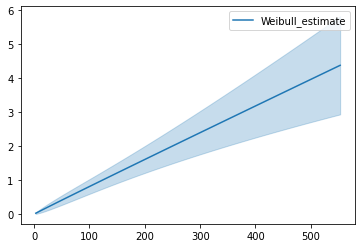

In [28]:
wbf.plot()

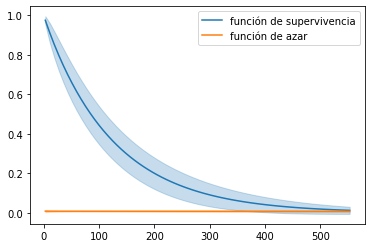

In [27]:
import matplotlib.pyplot as plt

wbf.plot_survival_function(label="función de supervivencia").legend()
wbf.plot_hazard(label="función de azar").legend()

# Long rank test (no paramétrico) 

In [9]:
veteran1.head()

,celltype,time,status,karno,diagtime,age,prior
0,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
2,squamous,228,1,60,3,38,0
3,squamous,126,1,60,9,63,10
4,squamous,118,1,70,11,65,10


In [10]:
veteran2.head()

,celltype,time,status,karno,diagtime,age,prior
69,squamous,999,1,90,12,54,10
70,squamous,112,1,80,6,60,0
71,squamous,87,0,80,3,48,0
72,squamous,231,0,50,8,52,10
73,squamous,242,1,50,1,70,0


In [12]:
from lifelines import KaplanMeierFitter

In [13]:
kmf1=KaplanMeierFitter() 
kmf1.fit(veteran1["time"], veteran1["status"], label="Grupo de tratamiento 1")

<lifelines.KaplanMeierFitter:"Grupo de tratamiento 1", fitted with 69 total observations, 5 right-censored observations>

In [14]:
kmf2=KaplanMeierFitter() 
kmf2.fit(veteran2["time"], veteran2["status"], label="Grupo de tratamiento 2")

<lifelines.KaplanMeierFitter:"Grupo de tratamiento 2", fitted with 68 total observations, 4 right-censored observations>

<AxesSubplot:xlabel='timeline'>

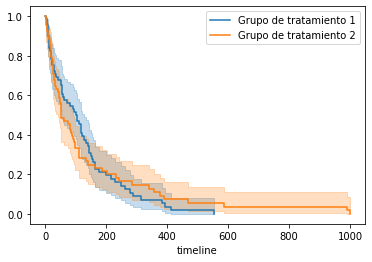

In [15]:
kmf1.plot_survival_function()
kmf2.plot_survival_function()

**Definición.-** El *Long-rank test* es una prueba sobre una muestra de tamaño grande con distribución $\chi^{2}$ para comparar dos o más "curvas KM".

Supongamos que tenemos $n$ variables aleatorias independientes e idénticamente distribuídas con distribución normal estándar $Z_{1},\dots, Z_{n}$. Definimos 
$$Q= Z_{1}^{2}+\cdots+ Z_{n}^{2}$$
Por un teorema de probabilidad $Q$ se distribuye como una variable aleatoria $\chi^{2}$ con $n$ grados de libertad.

Sea $X$ una variable aleatoria binomial con parámetros $(n,p)$. Por el Teorema Central del Límite, sabemos que
$$\frac{m-np}{\sqrt{npq}}$$
tiene distribución normal estándar. Aquí, $m$ es el número observado de éxitos en $n$ ensayos Bernoulli. Nuevamente, por el Teorema Central del Límite
$$\chi^{2}=\sum_{i=1}^{n}\frac{(O_{i}-E_{i})^{2}}{E_{i}}$$
- $O_{i}$ es el número observado de ocurrencias
- $E_{i}$ es el número esperado de ocurrencias.

El estadístico que vamos a usar, se conoce como el **test de Mantel-Haenszel**
$$\text{LRT}_{i}=\frac{\sum_{j=1}^{t}(O_{ij}-E_{ij})^{2}}{Var(O_{i}-E_{i}) } $$ 

$E_{ij}$ representa al número esperado de eventos para el grupo $i$ al tiempo $t_{j}$:
$$E_{ij}= \frac{n_{ij}\sum_{i}d_{ij}}{\sum_{i}n_{ij}},$$
en donde $n_{ij}$ es el número total de registros en riesgo al tiempo $t_{j}$ para el grupo $i$, y $d_{ij}$ es el número de eventos al tiempo $t_{j}$ para el grupo $i$

In [16]:
veteran.head()

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
0,1,1,squamous,72,1,60,7,69,0
1,2,1,squamous,411,1,70,5,64,10
2,3,1,squamous,228,1,60,3,38,0
3,4,1,squamous,126,1,60,9,63,10
4,5,1,squamous,118,1,70,11,65,10


**Ejemplo.-** Calculamos $E_{13}$:
$$E_{13}=\frac{n_{13}(d_{13}+d_{23})}{n_{13}+n_{23}}.$$

In [18]:
veteran_sorted = veteran.sort_values(by=["time"])
veteran_sorted

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
76,77,2,squamous,1,1,20,21,65,10
84,85,2,squamous,1,1,50,7,35,0
94,95,2,smallcell,2,1,40,36,44,10
52,53,1,adeno,3,1,30,3,43,0
17,18,1,smallcell,4,1,40,2,35,0
...,...,...,...,...,...,...,...,...,...
82,83,2,squamous,467,1,90,2,64,0
57,58,1,large,553,1,70,2,47,0
77,78,2,squamous,587,1,60,3,58,0
74,75,2,squamous,991,1,70,7,50,10


In [21]:
n11= len(veteran1)
n21= len(veteran2)
n11, n21

(69, 68)

In [22]:
n11+n21

137

- $n_{13}=68$
- $n_{23}=65$
- $d_{13}=1$
- $d_{23}=0$
 $$E_{13}=0.51$$

Ejercicio 3.- Calcula $E_{23}$ como lo hicimos en clase.

Ejercicio 4.- Calcula los primeros tres términos de $\text{LRT}_{1}$. Observa que, en nuestro caso, se cumple:
$$\text{var}(O_{i}-E_{i})=\sum_{j=1}^{t}\frac{n_{1j}n_{2j}(d_{1j}+d_{2j})(n_{1j}+n_{2j}-d_{1j}-d_{2j} )}{(n_{1j}+n_{2j})^{2}(n_{1j}+n_{2j}-1)}$$

**NOTA:** La hipótesis nula $H_{0}$ afirma que las curvas KM de dos grupos son idénticas. Como es costumbre, entre mayor $p$-value$>0.05$ se acepta $H_{0}$.

In [23]:
from lifelines.statistics import logrank_test

In [24]:
resultados = logrank_test(veteran1["time"], veteran2["time"], veteran1["status"], veteran2["status"])

In [25]:
resultados

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.01 0.93      0.11

$\color{blue}{\text{Ejercicio 5.- Explica las conclusiones que se obtuvieron}}.$